
# Project: Investigate No-show appointment dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>This project investigates the No-show appointment dataset. The dataset was originally gotten from Kaggle. The dataset has 150,257 entries with 14 features.</p>
<p>The datasets investigate how well people show up for appointments in Brazillian hospitals with the factors that could possibly contribute to their availability.</p>
<p>The following is a brief description of the data features</p>
<ol>
    <li><strong>Patientid</strong> - unique ID for each patients</li>
    <li><strong>AppointmentID</strong> - unique ID for each appointments</li>
    <li><strong>Gender</strong> - specifies the patient's gender</li>
    <li><strong>ScheduledDay</strong> - the day the patient scheduled the meeting</li>
    <li><strong>AppointmentDay</strong> - the day agreed upon for the meeting</li>
    <li><strong>Age</strong> - patient's age</li>
    <li><strong>Neighbourhood</strong> - the hospital's location</li>
    <li><strong>Scholarship</strong> - indicates whether the patient is enrolled in the Brazillian welfare program - <i>Bolsa Familia</i></li>
    <li><strong>Hipertension</strong> - indicates whether the patient is hypertensive or not</li>
    <li><strong>Diabetes</strong> - indicates whether the patient is diabetic or not</li>
    <li><strong>Alcoholism</strong> - indicates whether the patient is an alcoholic addict or not</li>
    <li><strong>Handcap</strong> - indicates whether the patient is an handicap or not</li>
    <li><strong>SMS_received</strong> - indicates how many SMS reminder the patient received before appointment day</li>
    <li><strong>No-show</strong> - the dependent variable that indicate whether the patient showed up for the appointment or not. <strong>No</strong> indicates that the patient showed up while <strong>Yes</strong> indicates that the patient did not show up for the appointment</li>
</ol>

### Questions
The Analysis will answer the following questions:
<ol>
    <li>Does nieighbourhood affect showiing up for appointment?</li>
    <li>Does being a particular gender contribute to availability for appointments</li>
    <li>Does being in a particular age range contribute to availability for appointment?</li>
    <li>Does having <i>Bolsa Familia</i> Scholarship guarantee attendance for appointments?</li>
    </ol>

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Overview

In [2]:
# Load dataset and preview
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Check for duplicates in dataset
df.duplicated().sum()

0

There is no duplicate column in the dataset

In [4]:
# Check number of rows and columns
df.shape

(110527, 14)

The data has 110527 entries with 14 columns

In [5]:
# Checking data types and number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset has no missing values

<strong>ScheduledDay</strong> and <strong>AppointmentDay</strong> columns does not have the correct data type

In [6]:
# Checking the distribution of the numerical data columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


A negative value is found in the <strong>Age</strong> column. Age cannot be negative.

In [7]:
# Checking the distribution of columns with object data type
df.describe(include = 'O').T

,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


Female priotize their health in comparison to male due to the higher number of scheduled appointments

In [8]:
# Checking number of unique values in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Number of unique patient ID is less than that of Appointment ID implying that some patients has more than one appointment in the hospital

### Changing column names

In [9]:
# replacing '-' with '_'in column names and changing it to lowercase
df.columns = df.columns.str.lower().str.replace('-', '_')
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

### Feature Engineering

In [10]:
# Changing ScheduledDay and AppointmentDay to datetime datatype
df.scheduledday = pd.to_datetime(df.scheduledday).dt.date
df.appointmentday = pd.to_datetime(df.appointmentday).dt.date

In [11]:
# Dropping Negative Age rows
df.drop(df[df.age < 0].index, axis = 0, inplace = True)

In [12]:
# Dropping patientId and AppointmentID columns
df.drop(['patientid', 'appointmentid'], axis = 1, inplace = True)

`PatientID` and `AppointmentID` are redundant information which cannot contribute to the analysis. Hence, the reason why they were dropped 

In [13]:
# replacing keywords
df.replace({'no_show': {'Yes': 'absent', 'No' : 'present'}}, inplace = True)
df.replace({'scholarship': {0 : 'Not Enrolled', 1 : 'Enrolled'}}, inplace = True)

The values in the `no_show` column were replaced with more understandable keywords to prevent confusion during the analysis. `Yes` was replaced with `absent` while `No` was replaced with `present`

In [14]:
df.shape

(110526, 12)

### Summary
After cleaning, the dataset has 110526 rows with 12 columns - removal of 2 columns( `PatientId` and `AppointmentID` ) and a row (the negative `Age` value)

<a id='eda'></a>
## Exploratory Data Analysis



### Question 1: Does neighbourhood affect showing up for appointment?

In [15]:
# Creating a dataframe for those present and absent for their appointments
present_df = df[df['no_show'] == 'present']
absent_df = df[df['no_show'] == 'absent']

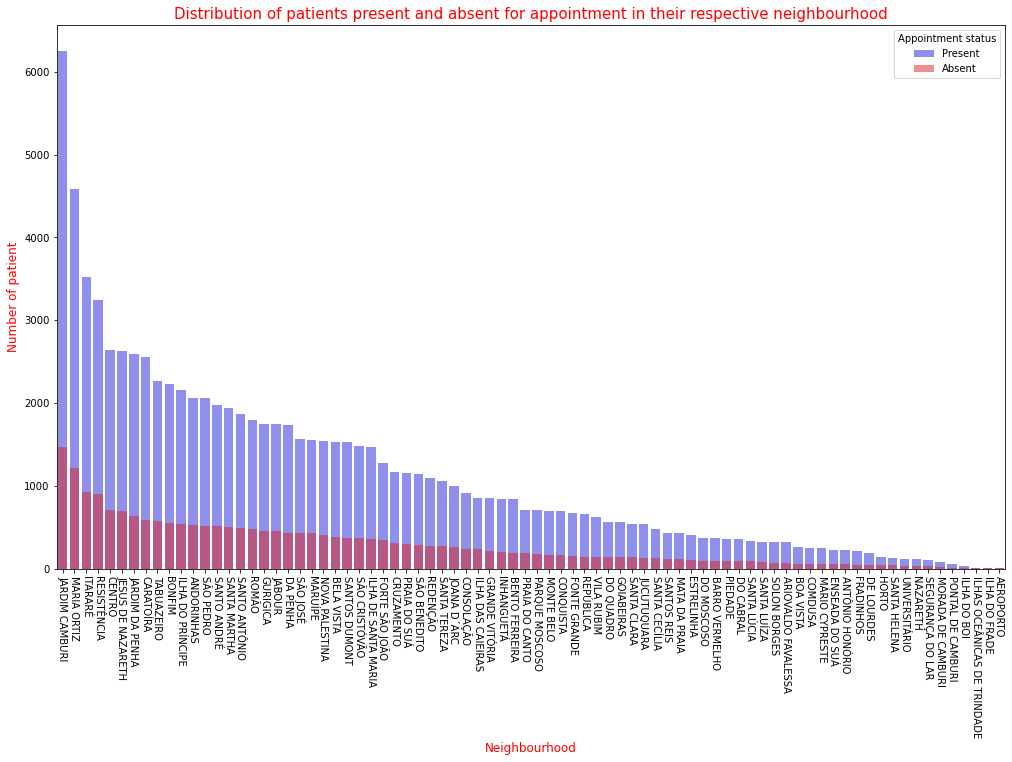

In [16]:
# Visualizing the distribution of patients in different neighbourhoods specifying those present and absent
plt.figure(figsize = (17, 10))
sns.barplot(x = present_df['neighbourhood'].value_counts().index, y = present_df['neighbourhood'].value_counts().values, color = 'b', alpha = 0.5, label = 'Present')
sns.barplot(x = absent_df['neighbourhood'].value_counts().index, y = absent_df['neighbourhood'].value_counts().values, color = 'r', alpha = 0.5, label = 'Absent')
plt.title('Distribution of patients present and absent for appointment in their respective neighbourhood', color = 'r', fontsize = 15)
plt.xlabel('Neighbourhood', color = 'r',fontsize = 12)
plt.ylabel('Number of patient', color = 'r',fontsize = 12)
plt.legend(title = 'Appointment status')
plt.xticks(rotation = -90)
plt.show()

The chart above doesn't exclusively describe the effect of neighbourhood on showing up for appointment since the number of patients varies across different neighbourhood. Hence, percentage of people absent will be generated below inorder to better analyze the relationship irrespective of the population.

In [17]:
# Creating a dataframe for patients present in each neighbourhood
neighbourhood_count_present = pd.DataFrame(present_df['neighbourhood'].value_counts()).reset_index()
neighbourhood_count_present.set_axis(['neighbourhood', 'present'], axis = 1, inplace = True)

# Creating a dataframe for patients absent in each neighbourhood
neighbourhood_count_absent = pd.DataFrame(absent_df['neighbourhood'].value_counts()).reset_index()
neighbourhood_count_absent.set_axis(['neighbourhood', 'absent'], axis = 1, inplace = True)

In [18]:
# merging the two dataframes together
neighbourhood_count = pd.merge(neighbourhood_count_present, neighbourhood_count_absent, on = 'neighbourhood')
neighbourhood_count

,neighbourhood,present,absent
0,JARDIM CAMBURI,6252,1465
1,MARIA ORTIZ,4586,1219
2,RESISTÊNCIA,3525,906
3,JARDIM DA PENHA,3246,631
4,SANTA MARTHA,2635,496
...,...,...,...
74,MORADA DE CAMBURI,80,16
75,PONTAL DE CAMBURI,57,12
76,ILHA DO BOI,32,3
77,ILHA DO FRADE,8,2


In [19]:
# Creating a new column to indicate the percentage of people absent in each neighbourhood
neighbourhood_count['percentage_absent'] = (neighbourhood_count['absent'] / (neighbourhood_count['absent'] + neighbourhood_count['present'])) * 100
neighbourhood_count

,neighbourhood,present,absent,percentage_absent
0,JARDIM CAMBURI,6252,1465,18.984061
1,MARIA ORTIZ,4586,1219,20.999139
2,RESISTÊNCIA,3525,906,20.446852
3,JARDIM DA PENHA,3246,631,16.275471
4,SANTA MARTHA,2635,496,15.841584
...,...,...,...,...
74,MORADA DE CAMBURI,80,16,16.666667
75,PONTAL DE CAMBURI,57,12,17.391304
76,ILHA DO BOI,32,3,8.571429
77,ILHA DO FRADE,8,2,20.000000


Percetage of patients absent for appointment is generated in the above cell

In [20]:
# Checking the distribution of the new dataframe
neighbourhood_count.describe().T

,count,mean,std,min,25%,50%,75%,max
present,79.0,1116.531646,1096.101084,7.000000,328.500000,710.000000,1648.000000,6252.000000
absent,79.0,282.493671,277.991324,1.000000,81.500000,190.000000,428.500000,1465.000000
percentage_absent,79.0,19.797035,3.169367,8.571429,18.027585,19.758849,21.697157,28.918495


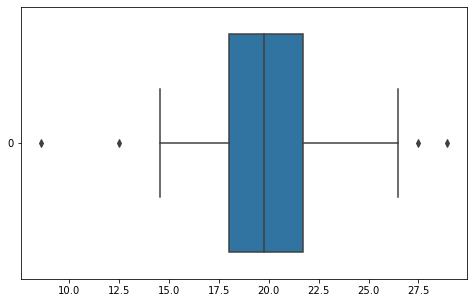

In [21]:
# Checking if percentage of patients absent in some neighbourboods vary significantly from the mean
plt.figure(figsize = (8,5))
sns.boxplot(data = neighbourhood_count['percentage_absent'], orient = 'h')
plt.show()

From the above chart, about 20% of patients in most neighbourhood did not show up for appointment with few exclusions (outliers). Hence, it can be concluded that, patients showing up for appointments is independent of their neighbourhood.

### Question 2: Does being a particular gender contribute to availability for appointments?

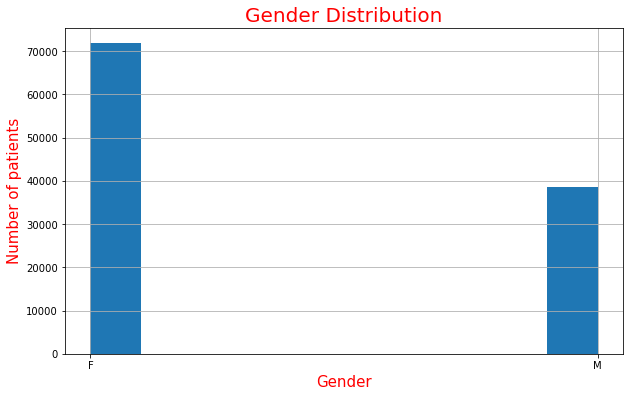

In [22]:
# Plotting Gender distribution
plt.figure(figsize= (10,6))
df['gender'].hist()
plt.title('Gender Distribution', color = 'r', fontsize = 20)
plt.xlabel('Gender',fontsize = 15, color = 'r')
plt.ylabel('Number of patients', fontsize =15, color = 'r');

More female than male scheduled appointments in Brazillian hospitals 

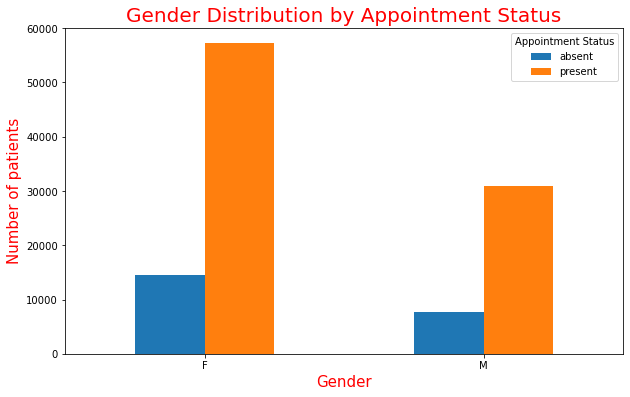

In [23]:
# checking gender distribution by appointment status
df.groupby('gender')['no_show'].value_counts().unstack().plot(kind = 'bar', figsize = (10,6))
plt.legend(title = 'Appointment Status')
plt.title('Gender Distribution by Appointment Status', fontsize = 20, color = 'r')
plt.xlabel('Gender', fontsize = 15, color = 'r')
plt.xticks(rotation = 0)
plt.ylabel('Number of patients', fontsize =15, color ='r');

In the chart above, not much inference could be made due to variation in the gender count. Hence, the gender count will be normalized using percentages.

In [24]:
# Creating a dataframe for patients present in both gender
gender_count_present = pd.DataFrame(present_df['gender'].value_counts()).reset_index()
gender_count_present.set_axis(['gender', 'present'], axis = 1, inplace = True)

# Creating a dataframe for patients absent in both gender
gender_count_absent = pd.DataFrame(absent_df['gender'].value_counts()).reset_index()
gender_count_absent.set_axis(['gender', 'absent'], axis = 1, inplace = True)

In [25]:
# merging the two dataframes together
gender_count = pd.merge(gender_count_present, gender_count_absent, on = 'gender')
gender_count

,gender,present,absent
0,F,57245,14594
1,M,30962,7725


In [26]:
# Creating a new column to indicate the percentage of people absent in each neighbourhood
gender_count['percentage_absent'] = (gender_count['absent'] / (gender_count['absent'] + gender_count['present'])) * 100
gender_count

,gender,present,absent,percentage_absent
0,F,57245,14594,20.314871
1,M,30962,7725,19.967948


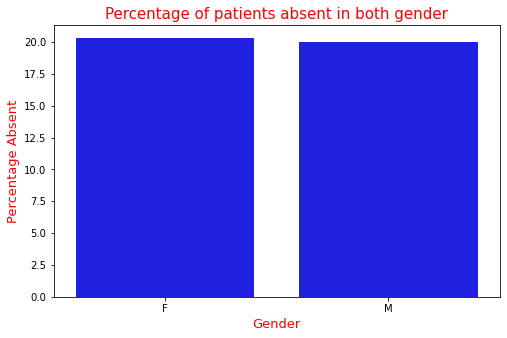

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(data = gender_count, x = 'gender', y = 'percentage_absent', color = 'b')
plt.title('Percentage of patients absent in both gender', color = 'r', fontsize = 15)
plt.xlabel('Gender', color = 'r', fontsize = 13)
plt.ylabel('Percentage Absent', color = 'r', fontsize = 13);

From the above chart, the percentage of patients absent for appointment in both gender is approximately equal. Hence, patients showing up for appointments is not dependent on their gender.

### Question 3: Does being in a particular age range contribute to availability for appointment?

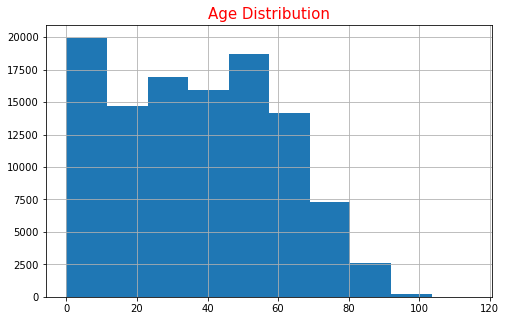

In [28]:
#Checking the age distribution
df['age'].hist(figsize = (8,5))
plt.title('Age Distribution', color = 'r', fontsize = 15);

Not much inference can be derived from the above chart due to variation in ages. Hence, for better analysis, the ages will be categorized into four has shown below

In [29]:
# creating a function for grouping age into categories
def agegroup(data):
    data.loc[data['age'] < 14, 'age_group'] = 'children'
    data.loc[data['age'].between(14,24), 'age_group'] = 'youths'
    data.loc[data['age'].between(24,64), 'age_group'] = 'adults'
    data.loc[data['age']>64, 'age_group'] = 'elders'
    return data.head()

For better analysis of the Age column, it was categorized into 4 - **children** (ages 0 - 14), **youths** (between ages 14 and 24), **adults** (between ages 24 and 64) and **elders** (ages above 64)

In [30]:
# calling previous function
agegroup(df)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,Not Enrolled,1,0,0,0,0,present,adults
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,Not Enrolled,0,0,0,0,0,present,adults
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,Not Enrolled,0,0,0,0,0,present,adults
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,Not Enrolled,0,0,0,0,0,present,children
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,Not Enrolled,1,1,0,0,0,present,adults


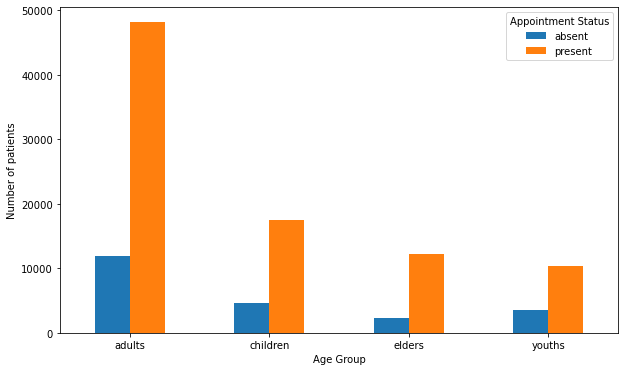

In [31]:
# Checking the appointment status of patients by their age group
df.groupby('age_group')['no_show'].value_counts().unstack().plot(kind = 'bar', figsize =(10,6))
plt.xlabel('Age Group')
plt.ylabel('Number of patients')
plt.legend(title = 'Appointment Status')
plt.xticks(rotation = 0);

In [32]:
# new dataframe is generated to show the count of patients present by age group
age_group_present = pd.DataFrame(df['age_group'][df['no_show'] == 'present'].value_counts()).reset_index()
age_group_present.set_axis(['age_group', 'present'], axis = 1, inplace = True)

# new dataframe is generated to show the count of patients absent by age group
age_group_absent = pd.DataFrame(df['age_group'][df['no_show'] == 'absent'].value_counts()).reset_index()
age_group_absent.set_axis(['age_group', 'absent'], axis = 1, inplace = True)

In [33]:
# the two dataframes generated above are merged together into another dataframe
age_group_df = pd.merge(age_group_present, age_group_absent, on = 'age_group')
age_group_df

,age_group,present,absent
0,adults,48158,11941
1,children,17529,4610
2,elders,12169,2233
3,youths,10351,3535


In [34]:
# a new column, percentage_absent is generated 
age_group_df['percentage_absent'] = (age_group_df.absent / (age_group_df.absent + age_group_df.present)) * 100
age_group_df = age_group_df.sort_values('percentage_absent')
age_group_df

,age_group,present,absent,percentage_absent
2,elders,12169,2233,15.504791
0,adults,48158,11941,19.868883
1,children,17529,4610,20.822982
3,youths,10351,3535,25.457295


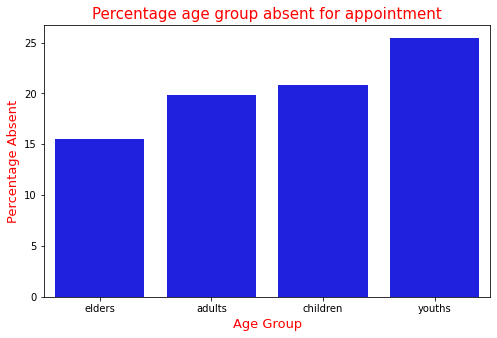

In [35]:
# plotting percentage age group absent for appointment
plt.figure(figsize = (8,5))
sns.barplot(x = 'age_group', y = 'percentage_absent', data = age_group_df, color = 'blue')
plt.xlabel('Age Group', fontsize = 13, color ='r')
plt.ylabel('Percentage Absent', fontsize = 13, color ='r')
plt.title('Percentage age group absent for appointment', fontsize = 15, color = 'r');

From the chart, age groups influence showing up for appointment. Elderly ones tend to take their health more serious than other age groups with the youths showing the least concern about attending to appointments.

### Question 4: Does having <i>Bolsa Familia</i> Scholarship guarantee attendance for appointments?

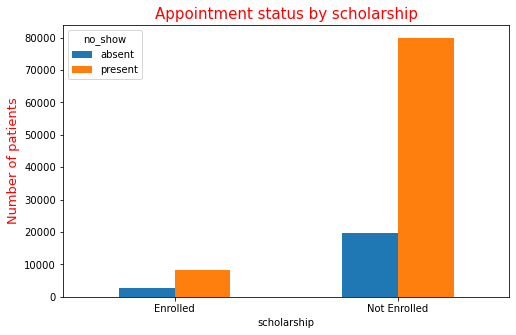

In [36]:
df.groupby('scholarship')['no_show'].value_counts().unstack().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 0)
plt.title('Appointment status by scholarship', color = 'r', fontsize = 15)
plt.ylabel('Number of patients', color = 'r', fontsize = 13);

A minority of the Brazillian population are enrolled the <i>Bolsa Familia</i> scholarship.</br>
This chart does not exclusively show the relationnship between being enrolled in the brazillain scholarship and showing up for appointments. The data will be better visualized in the form of percentages. Below are the steps taken.

In [37]:
# new dataframe is generated to show the count of patients present by scholarship enrollment
scholarship_present = pd.DataFrame(df['scholarship'][df['no_show'] == 'present'].value_counts()).reset_index()
scholarship_present.set_axis(['scholarship', 'present'], axis = 1, inplace = True)

# new dataframe is generated to show the count of patients absent by scholarship enrollment
scholarship_absent = pd.DataFrame(df['scholarship'][df['no_show'] == 'absent'].value_counts()).reset_index()
scholarship_absent.set_axis(['scholarship', 'absent'], axis = 1, inplace = True)

In [38]:
# the two dataframes above are merged together in a new dataframe
scholarship_df = pd.merge(scholarship_present, scholarship_absent, on = 'scholarship')
scholarship_df

,scholarship,present,absent
0,Not Enrolled,79924,19741
1,Enrolled,8283,2578


In [39]:
# a new column, percentage_absent is generated 
scholarship_df['percentage_absent'] = (scholarship_df.absent / (scholarship_df.absent + scholarship_df.present)) * 100
scholarship_df = scholarship_df.sort_values('percentage_absent')
scholarship_df

,scholarship,present,absent,percentage_absent
0,Not Enrolled,79924,19741,19.807355
1,Enrolled,8283,2578,23.736304


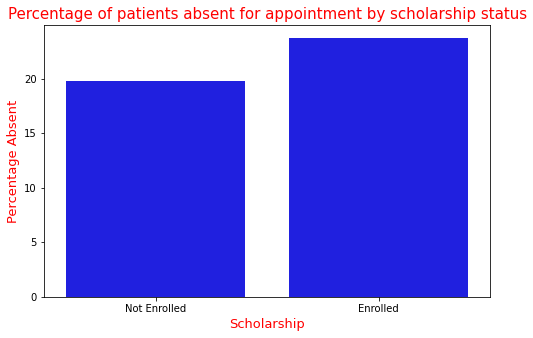

In [40]:
# plotting percentage age group absent for appointment
plt.figure(figsize = (8,5))
sns.barplot(x = 'scholarship', y = 'percentage_absent', data = scholarship_df, color = 'blue')
plt.xlabel('Scholarship', fontsize = 13, color ='r')
plt.ylabel('Percentage Absent', fontsize = 13, color ='r')
plt.title('Percentage of patients absent for appointment by scholarship status', fontsize = 15, color = 'r');

Being enrolled in the Brazillian scholarship does not guarantee showing up for appointments, even those enrolled in the program shows up the least.

<a id='conclusions'></a>
## Conclusions

After thorough analysis, the following insights were derived:
<ol>
    <li>Answering the question "Does neighbourhood affect showing up for appointment?". From the analysis, most neighbourhood has a percentage of about 20% patients absent for their appointment. This shows that neighbourhood doesn't affect how well patients show up for their appointments.</li>
    <li>Answering the question "Does being a particular gender contribute to availability for appointments?". It was inferred from analysis that though more female scheduled appointments in hospitals in comparison to male,they both have approximate percentage for showing up for appointments.</li>
    <li>Answering the question "Does being in a particular age range contribute to availability for appointment?". It can be deduced from the analysis, that, Elders (ages above 65) show up for appointment more while the youths (between ages 14 and 24) has the least attendace for appointment. The attendance rate ranks in this order - <strong>Elder</strong> > <strong>Adults</strong> > <strong>Children</strong> > <strong>Youths</strong>.</li>
    <li>To the last question of the analysis, "Does having <i>Bolsa Familia</i> Scholarship guarantee attendance for appointments?". From the analysis, a more higher percentage of patients enrolled in <em>Bolsa Familia</em> scholarship does not show up for appointment compared to those who are not enrolled. Hence, being a beneficiary of the brazillian scholarship does not neccessitate showing up for appointment.</li>
    </ol>
    
### Limitations
The analysis is limited as no advanced statistics was performed on the dataset. <br>
I made some inquiry on stackoverflow